In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'

In [11]:
# api 
import FinanceDataReader as fdr

global_name_list = [
    "KS11",
    "SSEC",
    "HSI",
    "N225",
    "FTSE",
    "FCHI",
    "GDAXI",
    'IXIC'
]

global_df_list = []

In [12]:

for name in global_name_list:
    global_df_list.append(fdr.DataReader(symbol=name, start='1990'))


In [13]:

for df in global_df_list:
    df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9049 entries, 1990-01-03 to 2024-12-19
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    7630 non-null   float64
 1   High    7631 non-null   float64
 2   Low     7630 non-null   float64
 3   Close   9049 non-null   float64
 4   Volume  9049 non-null   int64  
 5   Change  7629 non-null   float64
 6   UpDown  7629 non-null   float64
 7   Comp    7629 non-null   float64
 8   Amount  9048 non-null   float64
 9   MarCap  5813 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 777.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6827 entries, 1997-07-02 to 2024-12-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6655 non-null   float64
 1   High       6655 non-null   float64
 2   Low        6655 non-null   float64
 3   Close      6655 non-null   float64
 4   Volume    

In [14]:

serise_global_close_list = []
for df in global_df_list:
    serise_global_close_list.append((df['Close'] / df['Close'].iloc[0]) * 100)


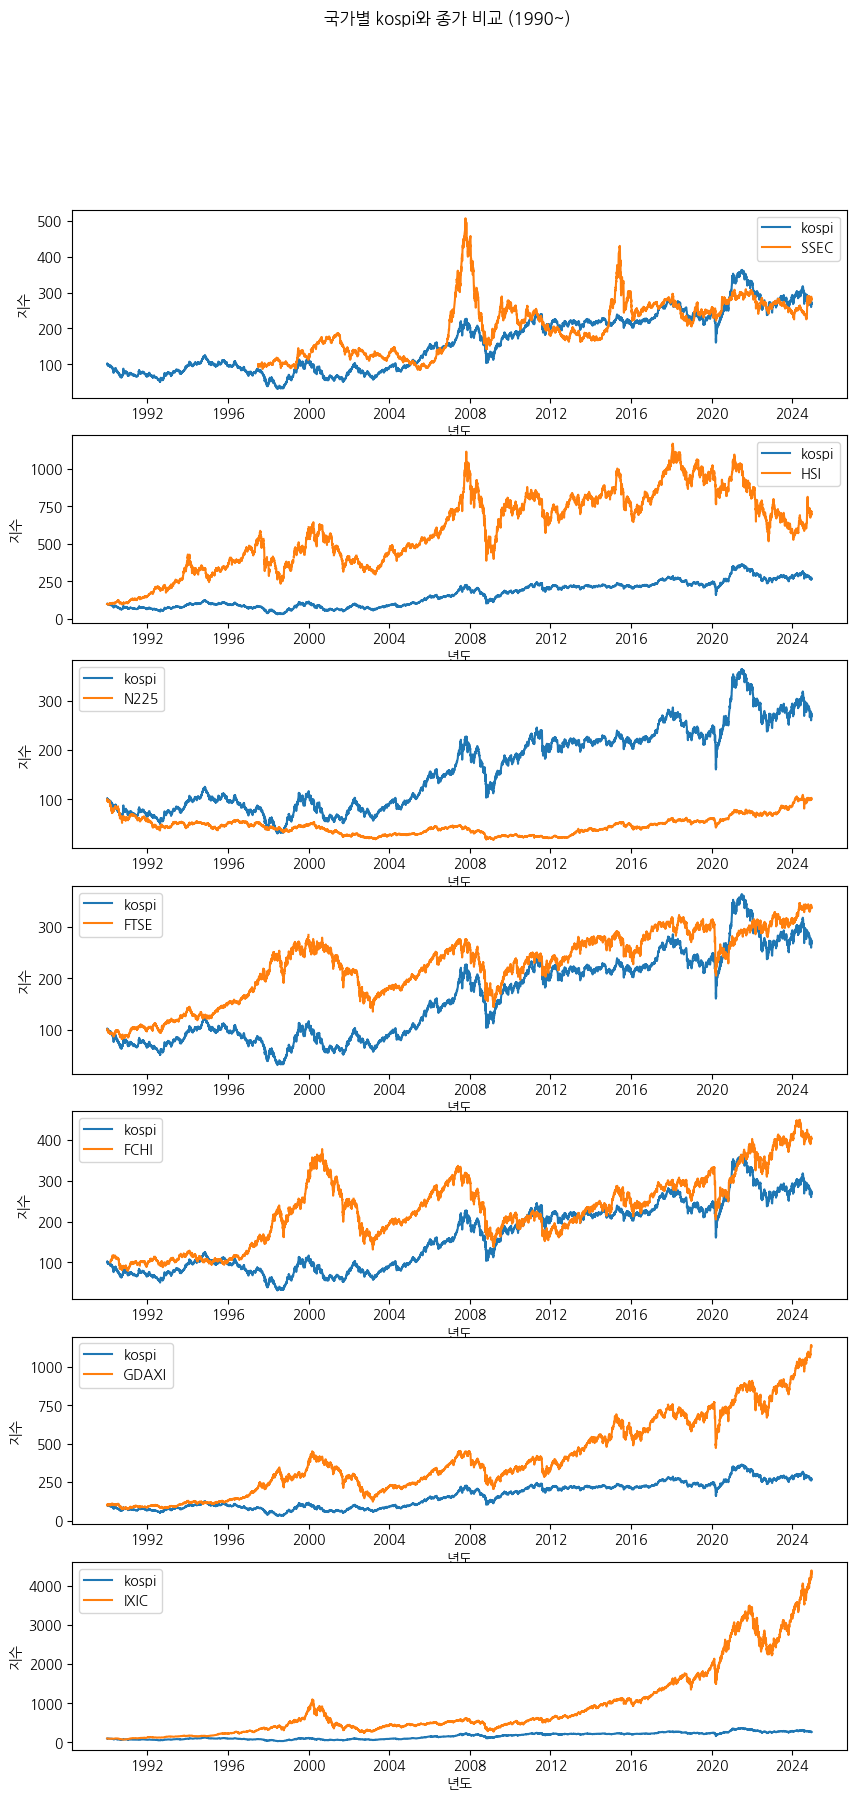

In [15]:
# fig, axes = plt.subplots(2,2,figsize=(14,10)) # 외곽 사이즈

fig, axes = plt.subplots(len(serise_global_close_list)-1,1,figsize=(10,20), dpi=100) # 외곽 사이즈

fig.suptitle('국가별 kospi와 종가 비교 (1990~)')
# fig.supxlabel('super x')
# fig.supylabel('super y')
kospi_close = serise_global_close_list[0]
for num, (global_index, global_name) in enumerate(zip(serise_global_close_list[1:], global_name_list[1:])):
    axes[num].plot(kospi_close.index, kospi_close, label='kospi' )
    axes[num].plot(global_index.index, global_index, label=global_name)
    # axes[num].set_title('axes first')
    axes[num].set_xlabel('년도')
    axes[num].set_ylabel('지수')
    axes[num].legend()


# plt.tight_layout()
plt.show()
